In [1]:
!jupyter nbconvert transposed_interpolation.ipynb --to python --no-prompt

[NbConvertApp] Converting notebook transposed_interpolation.ipynb to python
[NbConvertApp] Writing 1343 bytes to transposed_interpolation.py


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def matshow(A):
    fig, ax = plt.subplots()
    fig.colorbar(ax.matshow(A))

[[0.63571579 0.         0.         0.         0.        ]
 [0.36428421 0.         0.         0.         0.        ]
 [0.         0.25818498 0.57985807 0.77499382 0.        ]
 [0.         0.74181502 0.42014193 0.22500618 0.02186168]
 [0.         0.         0.         0.         0.97813832]]


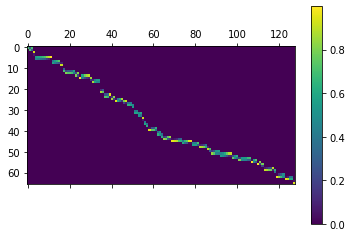

In [4]:
#
# Transposed interpolation (aka Triangular filter banks)
#
def transposed_interpolation(x, y):
    # TODO: take care the case where x[-1] == y[-1]
    assert y[0] <= x[0] and x[-1] < y[-1]
    assert all(0 < x[1:] - x[:-1])
    assert all(0 <  y[1:] - y[:-1])

    # Sparse matrix s.t. between[i,j]  <--iff-->  y_i <= x_j < y_{i+1}
    y_le_x = y[:-1].reshape(-1, 1) <= x
    between = y_le_x & ~ np.pad(y_le_x, ((0, 1), (0, 0)))[1:]
    
    x_sub_y = x - y[:-1].reshape(-1, 1)
    dy = y[1:] - y[:-1]

    t = (x_sub_y / dy.reshape(-1, 1)) * between
    _1_sub_t = (1 - t) * between
    result = np.pad(t, ((0, 1), (0, 0))) + np.pad(_1_sub_t, ((1, 0), (0, 0)))
    return result
    
def test_0():
    N = 5
    M = 3
    x = np.sort(np.random.rand(N))
    y = np.concatenate([[0], np.sort(np.random.rand(M)), [1]])
    print(transposed_interpolation(x, y))
    
def test_1():
    N = 2**7
    M = 2**6
    x = np.sort(np.random.rand(N))
    y = np.concatenate([[0], np.sort(np.random.rand(M)), [1]])
    matshow(transposed_interpolation(x, y))
    
test_0()
test_1()